# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Loading Dataset

In [7]:
df = pd.read_csv("Data\\1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Data Preprocessing

### Handle Missing Values

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

### Encode Categorical Feature

In [9]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Feature Selection & Train-Test Split

In [10]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training & Evaluation Function

In [11]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, rmse, r2

# Train the Models

### 1. Decision Tree Regressor

In [12]:
dt = DecisionTreeRegressor(random_state=42)
dt_pred, dt_mse, dt_rmse, dt_r2 = evaluate_model(
    dt, X_train, X_test, y_train, y_test
)

### 2. Random Forest Regressor

In [13]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_pred, rf_mse, rf_rmse, rf_r2 = evaluate_model(
    rf, X_train, X_test, y_train, y_test
)

### 3. Extra Trees Regressor (Extremely Randomized Trees)

In [14]:
et = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
et_pred, et_mse, et_rmse, et_r2 = evaluate_model(
    et, X_train, X_test, y_train, y_test
)

# Evaluation Metrics Summary

In [15]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Extra Trees"],
    "MSE": [dt_mse, rf_mse, et_mse],
    "RMSE": [dt_rmse, rf_rmse, et_rmse],
    "R² Score": [dt_r2, rf_r2, et_r2]
})

results

,Model,MSE,RMSE,R² Score
0,Decision Tree,4.865869e+09,69755.779954,0.628676
1,Random Forest,2.404746e+09,49038.209338,0.816489
2,Extra Trees,2.734729e+09,52294.639003,0.791307


# Predicted vs Actual Scatter Plots

In [16]:
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()

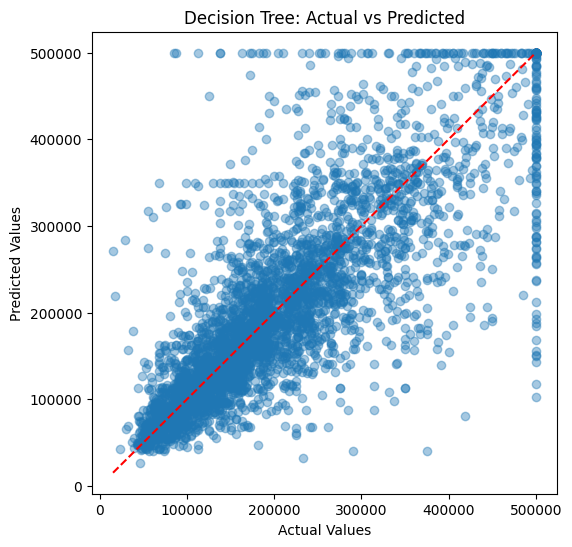

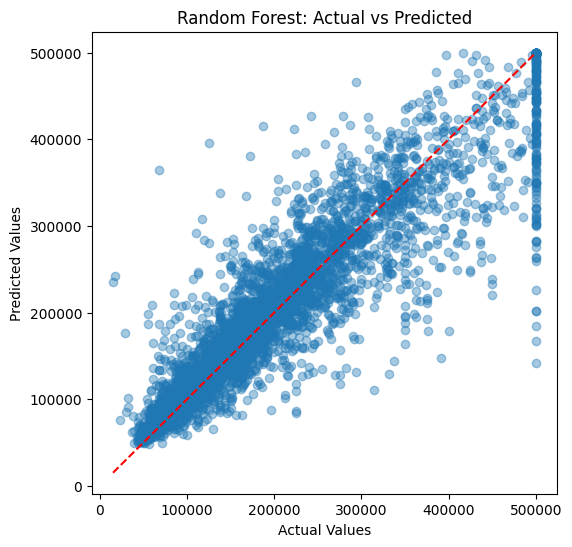

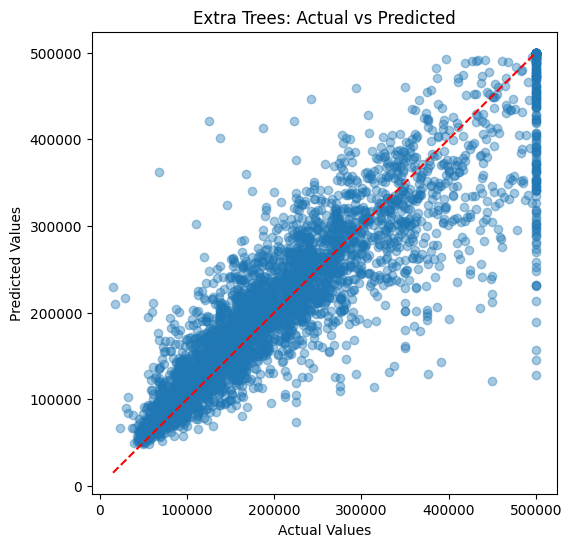

In [17]:
plot_predictions(y_test, dt_pred, "Decision Tree: Actual vs Predicted")
plot_predictions(y_test, rf_pred, "Random Forest: Actual vs Predicted")
plot_predictions(y_test, et_pred, "Extra Trees: Actual vs Predicted")

# Model Comparison & Discussion

Accuracy & Generalization:

1. Decision Tree

- Lowest performance

- High variance

- Tends to overfit training data

2. Random Forest

- Strong improvement in accuracy

- Reduces overfitting via bagging

- Good balance between bias and variance

3. Extra Trees

- Often best or comparable performance

- More randomness → better generalization

- Faster training due to random splits

# Model Behavior Comparison

1. Decision Tree: Single tree, easy to interpret, but unstable and prone to overfitting

2. Random Forest: Ensemble with bootstrapping, reduces variance, robust

3. Extra Trees:	Highly randomized splits, faster, often best generalization

# Conclusion

- Best Overall Model: ExtraTreesRegressor

- Most Interpretable: DecisionTreeRegressor

- Best Bias–Variance Tradeoff: RandomForestRegressor